# Análisis de grafos

### Docente: M.Sc. Richard Fernández

In [4]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [5]:
#NetworkX es una de las librerías de Python más utilizadas para trabajar con grafos y redes.
#Permite crear, manipular y analizar grafos de manera eficiente.
import networkx as nx

In [6]:
facebook = pd.read_csv("facebook_combined.txt",header=None,sep=" ",names=["user_1", "user_2"],)

In [7]:
facebook = facebook[:2000]
facebook.head()

#Al ser relaciones de amistad y no tener direccionalidad, se representan mediante un grafo no direccional.

,user_1,user_2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


### Creación de grafo

In [8]:
#from_pandas_edgelist: sirve para agregar nodos y enlaces de un grafo desde un archivo o dataframe.
G_facebook = nx.from_pandas_edgelist(facebook, source="user_1", target="user_2", create_using=nx.Graph())

### Información del grafo

In [9]:
print("Número de nodos:", G_facebook.number_of_nodes())
print("Número de enlaces:", G_facebook.number_of_edges())

Número de nodos: 713
Número de enlaces: 2000


### Matriz de adyacencia

In [10]:
adjM = nx.adjacency_matrix(G_facebook)
adjM = adjM.todense()
adjM

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Visualización de la red

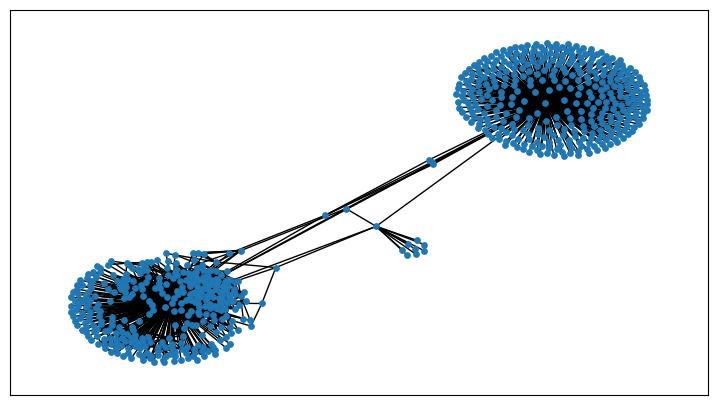

In [11]:
fig, ax = plt.subplots(figsize=(9, 5))
spring_pos = nx.spring_layout(G_facebook)
nx.draw_networkx(G_facebook, pos=spring_pos, with_labels=False, node_size=15, ax=ax)

#Al visualizar la red se observa que hay tres comunidades de usuarios:
#Dos grandes conjuntos de usuarios altamente conectados.
#Un grupo de unos pocos nodos centrales, algunos de los cuales conectan los otros dos grandes grupos.

### Vecinos y grado

In [12]:
#Para cualquier nodo del grafo, se puede conocer quienes son sus vecinos y su grado (el número de vecinos que tiene el nodo).
#A continuación algunas definiciones importantes:

#Grado de un nodo: el número de enlaces que tiene un nodo. Los grafos dirigidos presentan dos tipos de grado "in degree" para conexiones entrantes y "out degree" para conexiones salientes.
#Vecindario de un nodo: los nodos a los que está conectado directamente un nodo.
#Grado medio: el promedio del grado de todos los nodos en una red.

In [13]:
nodo_id = 4
vecinos = list(G_facebook.neighbors(nodo_id))
print("Vecinos del nodo {nodo_id}:", vecinos)

grado = G_facebook.degree[nodo_id]
print("Grado del nodo {nodo_id}:", grado)

Vecinos del nodo {nodo_id}: [0, 78, 152, 181, 195, 218, 273, 275, 306, 328]
Grado del nodo {nodo_id}: 10


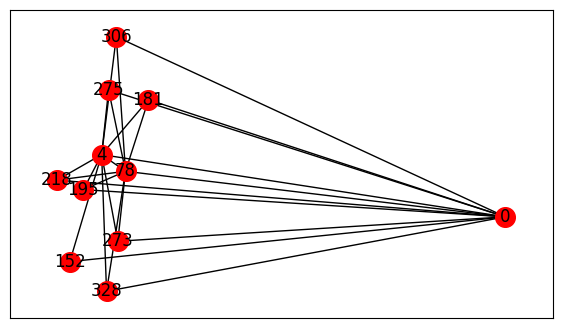

In [14]:
nodos = vecinos + [nodo_id]
G_s = nx.subgraph(G_facebook, nodos)

fig, ax = plt.subplots(figsize=(7, 4))
nx.draw_networkx(G_s, pos=spring_pos, with_labels=True, node_size=200, node_color='r', ax=ax)

### Centralidad

In [15]:
#la centralidad es un concepto utilizado para medir la importancia de los nodos en un grafo.

In [16]:
# Métricas de centralidad para un único nodo
nodo_id = 4

In [17]:
# 1. **Centralidad de grado**
# Se basa en el número de enlaces que tiene un nodo. Es el número de enlaces que entran y salen de un nodo.
centralidad_grado = nx.degree_centrality(G_facebook)
print("Centralidad de grado:", centralidad_grado[nodo_id])

Centralidad de grado: 0.014044943820224719


In [18]:
# 2. **Centralidad de intermediación**
# Mide la cantidad de caminos que pasan por un nodo.
centralidad_intermediacion = nx.betweenness_centrality(G_facebook)
print("Centralidad de intermediación:", centralidad_intermediacion[nodo_id])

Centralidad de intermediación: 4.345833530871221e-05


In [19]:
# 3. **Centralidad de cercanía**
# Mide la distancia promedio desde un nodo a todos los demás nodos del grafo.
centralidad_cercania = nx.closeness_centrality(G_facebook)
print("Centralidad de cercanía:", centralidad_cercania[nodo_id])

Centralidad de cercanía: 0.40022484541877457


In [20]:
# Métricas de centralidad para todos los nodos
grado = pd.DataFrame.from_dict(centralidad_grado, orient='index',columns=["grado"])
intermendiacion = pd.DataFrame.from_dict(centralidad_intermediacion, orient='index',columns=["intermediacion"])
cercania = pd.DataFrame.from_dict(centralidad_cercania, orient='index',columns=["cercania"])
centralidad = pd.concat([grado, intermendiacion, cercania], axis=1)
centralidad

,grado,intermediacion,cercania
0,0.487360,0.704019,0.661096
1,0.023876,0.000119,0.401806
2,0.014045,0.000026,0.400225
3,0.023876,0.000079,0.401806
4,0.014045,0.000043,0.400225
...,...,...,...
1222,0.001404,0.000000,0.401127
1223,0.001404,0.000000,0.401127
1224,0.001404,0.000000,0.401127
1225,0.001404,0.000000,0.401127


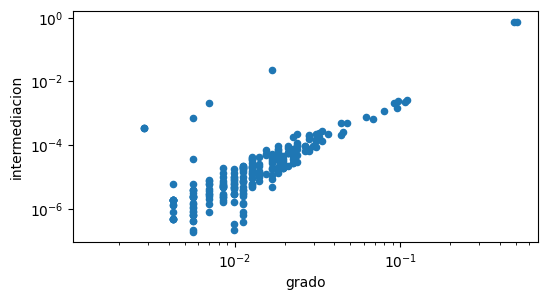

In [21]:
fig, ax = plt.subplots(figsize=(6, 3))
centralidad.plot.scatter(x="grado", y="intermediacion", ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

In [22]:
#Fuente: Introducción a grafos y redes con Python por Fernando Carazo y Joaquín Amat, available under a Attribution 4.0 International (CC BY 4.0)